Recursive Feature Elimination

- feaure 중요도가 낮은 속성들을 차례로 제거해 가면서 반복적으로 학습 / 평가를 수행하여 최적 feature 추출

- 수행시간이 오래 걸리고, 낮은 속성들을 제거해 나가는 메커니즘이 정확한 Feature Selection을 찾는 목표에 정확히 부합하지 않을 수 있음

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


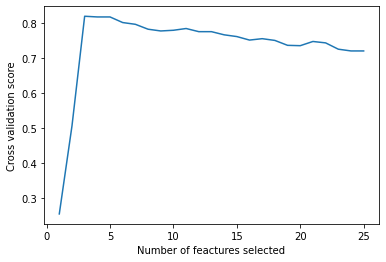

In [ ]:
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3, n_redundant=2, n_repeated=0,
                          n_classes=8, n_clusters_per_class = 1, random_state=0)

svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)
rfecv.fit(X, y)

print("features : ", rfecv.n_features_)

plt.figure()
plt.xlabel('Number of feactures selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# SelcetFromModel

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X, y = diabetes.data, diabetes.target

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

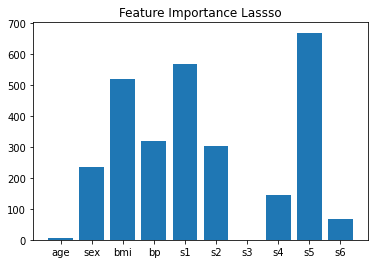

In [ ]:
lasso = LassoCV().fit(X, y)
importace = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)

plt.bar(height=importace, x=feature_names)
plt.title('Feature Importance Lassso')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time
threshold = np.sort(importace)[-3] + 0.01
print('threshold :', threshold)

sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)

sfm = SelectFromModel(lasso, threshold='median').fit(X, y)

print('Feature Select', feature_names[sfm.get_support()])

threshold : 521.748542606749
Feature Select ['bmi' 'bp' 's1' 's2' 's5']


# Permutation(순열) importace
- 특정 피처들의 값을 완전히 변조했을 때 모델 성능이 얼마나 저하되는지를 기준으로 해당 피처의 중요도를 산정

- 학습 데이터를 제거하거나 변조하면 다시 제 학습을 수행해야 하므로 수행시간이 오래 걸림

- 일반적으로 테스트 데이터에 특정 피처들을 반복적으로 변존한 뒤 해당 피처의 중요도를 평균적으로 산정

https://scikit-learn.org/stable/modules/permutation_importance.html

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
y_pred = model.predict(X_test)
print('r2_score', r2_score(y_test, y_pred))

r2_score 0.35666062386954556


In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

# 가장 평균 permutation_importance가 높은 순으로 내림차순으로 정렬 후 평균 permutation_importance값과 표준 편차 출력
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(diabetes.feature_names[i], " ", np.round(r.importances_mean[i], 4),' +/-', np.round(r.importances_std[i], 4))

s5   0.2042  +/- 0.0496
bmi   0.1758  +/- 0.0484
bp   0.0884  +/- 0.0328
sex   0.0559  +/- 0.0232


In [ ]:
print(diabetes.feature_names)
print(r.importances_mean.tolist())

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[-0.001992665521383626, 0.055874066190552574, 0.175790002055375, 0.08836512662857325, 0.04221133518249829, 0.0020362558443757155, 0.0020375366229764473, 0.00318695340309784, 0.2042341215487485, 0.0027868301016924944]


# 왜 featrue importance는 절대적인 feature slection 기준이 될 수 없는가?

- Featrue importance는 최적 tree 구조를 만들기 위한 피처들의 impurity가 중요 기준임, 결정 값과 관련이 없어도 Featrue importance가 높아 질 수 있음.
- Featrue importance는 학습 데이터를 기반으로 생성됨, 테스트 데이터 에서는 달라질 수 있음
- Featrue importance number형의 높은 cardinality feature에 biased 되어 있음


## Permutation(순열) importace VS Random Forest Features Importance

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

https://tootouch.github.io/IML/permutation_feature_importance/

데이터의 구성에 따라 중요 픽쳐가 달라지기 때문에 픽쳐를 선택하는 절대적인 방법은 아님 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/titanic_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Embarked'].fillna('S', inplace = True)
df['Cabin'].fillna('N', inplace = True)

print('* 결측치의 개수 *')
df.isna().sum()

* 결측치의 개수 *


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
rng = np.random.RandomState(seed=42)
# 3가지 값으로 caltegory 값 random 결정
df['random_cat'] = rng.randint(3, size=df.shape[0])
# X건수만큼 고유한 random값 결정
df['random_num'] = rng.randn(df.shape[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,random_cat,random_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2,-2.145857
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.512941
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,2,-1.218490
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,-1.160325
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,0,-0.041626


In [ ]:
cols = ['Pclass','Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Cabin',	'Embarked',	'random_cat',	'random_num']
target = 'Survived'

In [ ]:
for col in cols:
  le = LabelEncoder()
  le = le.fit(df[col])
  df[col] = le.transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,random_cat,random_num
0,1,0,2,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,18,146,2,2,11
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,52,1,0,PC 17599,207,81,0,0,589
2,3,1,2,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,41,146,2,2,111
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,48,1,0,113803,189,55,2,2,122
4,5,0,2,"Allen, Mr. William Henry",1,48,0,0,373450,43,146,2,0,407


In [ ]:
X = df[cols]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.758


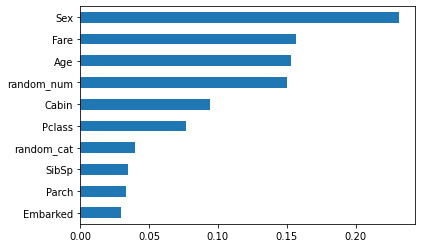

In [ ]:
pd.Series(index = X_train.columns, data = rf.feature_importances_).sort_values().plot.barh()

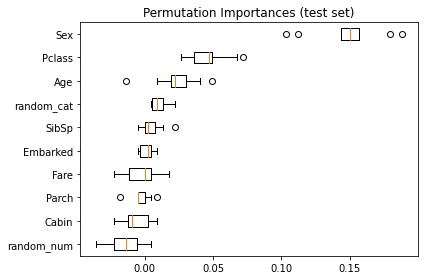

In [ ]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

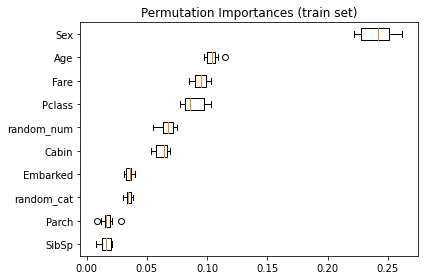

In [ ]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()